In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Dense, Conv2D, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# root dir 설정

In [2]:
import os

ROOT_DIR = '/content'

DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'surface_crack')

TRAIN_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'train')

TEST_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'test')

# Google Drive 마운트해서 데이터셋 가져옴

In [3]:
from google.colab import drive   
drive.mount('/content/gdrive/')  

Mounted at /content/gdrive/


In [4]:
import shutil
import os

try:
    dataset_path = '/content/gdrive/My Drive/Colab Notebooks/dataset'    
    shutil.copy(os.path.join(dataset_path, 'surface_crack.zip'), ROOT_DIR)

except Exception as err:
    print(str(err))

In [5]:
import os
import shutil

if os.path.exists(DATA_ROOT_DIR):
    
    shutil.rmtree(DATA_ROOT_DIR)
    print(DATA_ROOT_DIR + ' is removed !!!')

In [6]:
# 압축파일 풀기

import zipfile

with zipfile.ZipFile(os.path.join(ROOT_DIR, 'surface_crack.zip'), 'r') as target_file:

    target_file.extractall(DATA_ROOT_DIR) 

# surface_crack/Positive 확인
# surface_crack/Negative 확인

In [7]:
import os

# Positive / Negative 전체 데이터 개수 확인

label_name_list = os.listdir(DATA_ROOT_DIR)

print(label_name_list)

for label_name in label_name_list:

    label_dir = os.path.join(DATA_ROOT_DIR, label_name)

    print('train label : ' + label_name + ' => ', len(os.listdir(os.path.join(DATA_ROOT_DIR, label_name))))

print('=====================================================')

['Negative', 'Positive']
train label : Negative =>  20000
train label : Positive =>  20000


# copytree 이용해서 Positive, Negative 모든 내용을 train 디렉토리 아래로 동일한 이름의 디렉토리로 복사함
### 이때, train 디렉토리는 자동으로 생성됨 (미리 생성하면 copytree 사용법상 error 발생)

In [8]:
import shutil

try:
    shutil.copytree(DATA_ROOT_DIR, TRAIN_DATA_ROOT_DIR)
    
except Exception as err:
    print(str(err))

# train/Positive, train/Negative 파일 개수 확인

In [9]:
import os

# Positive / Negative 전체 데이터 개수 확인

label_name_list = os.listdir(TRAIN_DATA_ROOT_DIR)

print(label_name_list)

for label_name in label_name_list:

    label_dir = os.path.join(TRAIN_DATA_ROOT_DIR, label_name)

    print('train label : ' + label_name + ' => ', len(os.listdir(os.path.join(TRAIN_DATA_ROOT_DIR, label_name))))

print('=====================================================')

['Negative', 'Positive']
train label : Negative =>  20000
train label : Positive =>  20000


# surface_crack/test 디렉토리 생성
# surface_crack/test/Positive, Negative 디렉토리 생성

In [10]:
#==============================================================
# test dir 생성
#==============================================================
if not os.path.exists(TEST_DATA_ROOT_DIR):

    os.mkdir(TEST_DATA_ROOT_DIR)
    print(TEST_DATA_ROOT_DIR + ' is created !!')
    
else:
    print(TEST_DATA_ROOT_DIR + ' already exists')
#==============================================================


#==============================================================
# test/Positive 생성
#==============================================================
if not os.path.exists(os.path.join(TEST_DATA_ROOT_DIR, 'Positive')):

    os.mkdir(os.path.join(TEST_DATA_ROOT_DIR, 'Positive'))
    print(os.path.join(TEST_DATA_ROOT_DIR, 'Positive') + ' is created !!')

else:
    print(os.path.join(TEST_DATA_ROOT_DIR, 'Positive') + ' already exists')

#==============================================================
# test/Negative 생성
#==============================================================
if not os.path.exists(os.path.join(TEST_DATA_ROOT_DIR, 'Negative')):

    os.mkdir(os.path.join(TEST_DATA_ROOT_DIR, 'Negative'))
    print(os.path.join(TEST_DATA_ROOT_DIR, 'Negative') + ' is created !!')

else:
    print(os.path.join(TEST_DATA_ROOT_DIR, 'Negative') + ' already exists')
#==============================================================

/content/surface_crack/test is created !!
/content/surface_crack/test/Positive is created !!
/content/surface_crack/test/Negative is created !!


# move 비율 설정

In [11]:
# 파일 move 비율

MOVE_RATIO = 0.2  # train : test = 80 : 20, 즉 train 데이터 20% 데이터를 test 데이터로 사용

# 원하는 비율만큼 Positive -> train/Positive  move   
# 원하는 비율만큼 Negative -> train/Negative  move

In [12]:
import os
import glob
import shutil
import random

# 파일 move train_data_dir => test_data_dir

label_name_list = os.listdir(TRAIN_DATA_ROOT_DIR)

for label_name in label_name_list:

    # 파일 move 하기 위한 src_dir_path, dst_dir_path 설정
    #=========================================================
    src_dir_path = os.path.join(TRAIN_DATA_ROOT_DIR,label_name)  # /content/surfae_crack/train/Positive
    dst_dir_path = os.path.join(TEST_DATA_ROOT_DIR,label_name)  # /content/surfae_crack/test/Positive
    #=========================================================

    train_data_file_list = os.listdir(src_dir_path)

    print('========================================================================')
    print('total [%s] data file nums => [%s]' % (label_name ,len(train_data_file_list)))

    # data shuffle
    random.shuffle(train_data_file_list)
    print('train data shuffle is done !!!')

    split_num = int(MOVE_RATIO*len(train_data_file_list))

    print('split nums => ', split_num)

    # extract test data from train data
    test_data_file_list = train_data_file_list[0:split_num]

    move_nums = 0

    for test_data_file in test_data_file_list:

        try:
            shutil.move(os.path.join(src_dir_path, test_data_file),
                        os.path.join(dst_dir_path, test_data_file))   
        except Exception as err:
            print(str(err))

        move_nums = move_nums + 1

    print('total move nums => ', move_nums)
    print('========================================================================')

total [Negative] data file nums => [20000]
train data shuffle is done !!!
split nums =>  4000
total move nums =>  4000
total [Positive] data file nums => [20000]
train data shuffle is done !!!
split nums =>  4000
total move nums =>  4000


# train/Positive, train/Negative 파일 개수 확인
# test/Positive, test/Negative 파일 개수 확인

In [13]:
import os

#==============================================================================
# train 파일 개수 확인
#==============================================================================

# Positive / Negative 전체 데이터 개수 확인

label_name_list = os.listdir(TRAIN_DATA_ROOT_DIR)

print(label_name_list)

for label_name in label_name_list:

    label_dir = os.path.join(TRAIN_DATA_ROOT_DIR, label_name)

    print('train label : ' + label_name + ' => ', len(os.listdir(os.path.join(TRAIN_DATA_ROOT_DIR, label_name))))

print('=====================================================')

#==============================================================================


#==============================================================================
# test 파일 개수 확인
#==============================================================================

# Positive / Negative 전체 데이터 개수 확인

label_name_list = os.listdir(TEST_DATA_ROOT_DIR)

print(label_name_list)

for label_name in label_name_list:

    label_dir = os.path.join(TEST_DATA_ROOT_DIR, label_name)

    print('test label : ' + label_name + ' => ', len(os.listdir(os.path.join(TEST_DATA_ROOT_DIR, label_name))))

print('=====================================================')

#==============================================================================

['Negative', 'Positive']
train label : Negative =>  16000
train label : Positive =>  16000
['Negative', 'Positive']
test label : Negative =>  4000
test label : Positive =>  4000


# ImageDataGenerator 이용하여 데이터 불러옴

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.20)  # 20% 비율로 validation 생성

validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1./255 )

# 이미지 shape 설정

In [15]:
IMG_WIDTH = 128
IMG_HEIGHT = 128

# flow_from_directory 설정

In [33]:
train_generator = train_datagen.flow_from_directory(TRAIN_DATA_ROOT_DIR, batch_size=32,
                                                color_mode='rgb', class_mode='sparse',
                                                target_size=(IMG_WIDTH,IMG_HEIGHT),
                                                subset='training')


validation_generator = validation_datagen.flow_from_directory(TRAIN_DATA_ROOT_DIR, batch_size=32,
                                                color_mode='rgb', class_mode='sparse',
                                                target_size=(IMG_WIDTH,IMG_HEIGHT),
                                                subset='validation')


test_generator = test_datagen.flow_from_directory(TEST_DATA_ROOT_DIR, batch_size=32, 
                                              color_mode='rgb', class_mode='sparse',
                                              target_size=(IMG_WIDTH,IMG_HEIGHT))

Found 25600 images belonging to 2 classes.
Found 6400 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


In [34]:
print(train_generator.class_indices)
print(train_generator.num_classes)

{'Negative': 0, 'Positive': 1}
2


# 32 개의 데이터와 정답 가져와서 출력

In [47]:
data, label = train_generator.next()

print(data.shape, label.shape)
print(label)

(32, 128, 128, 3) (32,)
[0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0.]


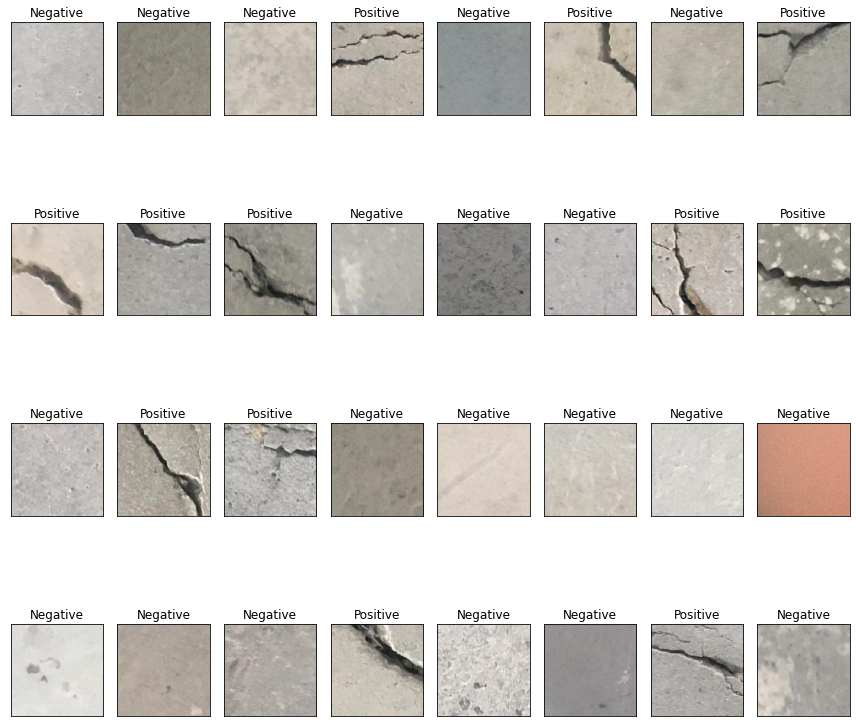

In [51]:
import matplotlib.pyplot as plt

class_dict = { 0:'Negative', 1:'Positive' }

plt.figure(figsize=(12,12))

for i in range(len(label)):

    plt.subplot(4, 8, i+1)
    plt.title(str(class_dict[label[i]]))
    plt.xticks([]);  plt.yticks([])

    plt.imshow(data[i])

plt.tight_layout()
plt.show()

# CNN model 정의 및 모델 구축

In [41]:
class_nums = train_generator.num_classes 

model = Sequential()

model.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', padding='same', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(kernel_size=(3,3), filters=128, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(GlobalAveragePooling2D())

# 32개면 정확도가 낮음. 256은 약 98% 이나 trend 가 거칠다
# 512 일때 정확도가 더 높고 256에 비해 정확도와 손실값이 그나마 안정적이다
model.add(Dense(512, activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(class_nums, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 64, 64, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 32, 32, 64)       

In [42]:
model.compile(loss='sparse_categorical_crossentropy', 
            optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['acc'])

In [43]:
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime

earlystopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)


start_time = datetime.now()

hist = model.fit(train_generator, epochs=30, validation_data=validation_generator, 
                 callbacks=[earlystopping])

end_time = datetime.now()

print('Elapsed Time => ', end_time-start_time)

Epoch 1/30
800/800 [==============================] - 41s 50ms/step - loss: 0.3861 - acc: 0.7923 - val_loss: 0.1115 - val_acc: 0.9752
Epoch 2/30
800/800 [==============================] - 40s 50ms/step - loss: 0.0897 - acc: 0.9737 - val_loss: 0.0906 - val_acc: 0.9842
Epoch 3/30
800/800 [==============================] - 41s 52ms/step - loss: 0.0681 - acc: 0.9797 - val_loss: 0.0615 - val_acc: 0.9856
Epoch 4/30
800/800 [==============================] - 43s 54ms/step - loss: 0.0595 - acc: 0.9814 - val_loss: 0.0744 - val_acc: 0.9853
Epoch 5/30
800/800 [==============================] - 40s 50ms/step - loss: 0.0558 - acc: 0.9831 - val_loss: 0.0561 - val_acc: 0.9880
Epoch 6/30
800/800 [==============================] - 40s 50ms/step - loss: 0.0504 - acc: 0.9843 - val_loss: 0.0393 - val_acc: 0.9887
Epoch 7/30
800/800 [==============================] - 40s 50ms/step - loss: 0.0475 - acc: 0.9854 - val_loss: 0.0363 - val_acc: 0.9894
Epoch 8/30
800/800 [==============================] - 40s 50ms

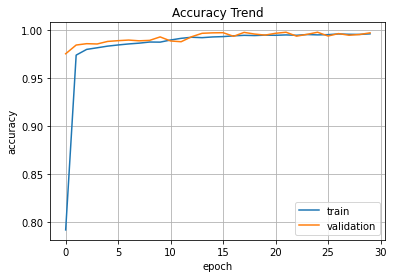

In [44]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='validation')
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

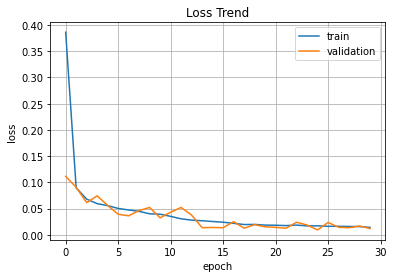

In [45]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

In [46]:
model.evaluate(test_generator)

250/250 [==============================] - 9s 37ms/step - loss: 0.0125 - acc: 0.9965


[0.0124710313975811, 0.9965000152587891]